# 1. 读入数据并完成简单的数据清洗

In [121]:
# FILEPATH
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from imageio import imread
import wordcloud
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import cross_val_score as CVS

# Read the Mydata.xlsx file in the same folder
df = pd.read_excel('Mydata.xlsx')

# Archive the original dataframe
df_archive = copy.deepcopy(df)

# Display data and data types
# create a new dataframe with column data types added to the column names
df_display = pd.DataFrame(columns=[f"{col} ({df[col].dtype})" for col in df.columns], data=df.values)

df_display # display the new dataframe

,职位 (object),公司名称 (object),地区 (object),公司类别 (object),公司规模 (object),行业类别 (object),经验 (int64),学历 (object),人数 (object),描述 (object),最低薪资 (float64),最高薪资 (float64)
0,万向联合诚聘金融交易助理/数据分析 期待你的加入,北京万向联合控股集团有限公司,北京,合资,150-500人,金融/投资/证券,0,本科,招聘10人,想要付出多少努力 便已经定格好要赚多少钱 l 每个月薪资 随随便便找一个文职工作就可以了 l...,8000.0,9999.0
1,数据分析师,酷我音乐,北京,外资,150-500人,互联网/电子商务,3,无,招聘1人,岗位职责 根据需求收集数据 日常数据整理 分析 对线上业务需求建立相应的数据模型 各部门数据...,10000.0,14999.0
2,QA 数据分析,北京互联企信信息技术有限公司,北京,外资,1000-5000人,外包服务,0,大专,招聘1人,岗位职责 进行日常 周度 月度 季度数据分析 负责呼叫中心质检部门 整体运营报表的 整合数据...,4500.0,5999.0
3,数据分析师 (职位编号：yunshan002894),美菜网,北京,外资,1000-5000人,互联网/电子商务,3,大专,招聘1人,岗位职责 根据业务量数据合理预算人员需求 提高人效 控制客服中心成本使用 通过提高人效 降低...,6000.0,10000.0
4,高级数据分析师/SAS工程师,博易智软（北京）技术股份有限公司,北京,上市公司,150-500人,计算机软件,3,本科,招聘2人,岗位职责 对海量业务数据进行诊断 分析 从数据中挖掘和整理客户行为特征 满足建模研究的需要 ...,15000.0,19999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7384,运营主管,北京恒昌利通投资管理有限公司,深圳,民营公司,10000人以上,互联网/电子商务,3,本科,招聘1人,岗位职责 负责车贷业务报表的管理 数据的统计 负责逾期业务分析 参与业务流程的制定与优化 上...,8000.0,12000.0
7385,手机产品经理（大型上市公司，待遇丰厚）,深圳市拓仕企业管理顾问有限公司,深圳,合资,50-150人,专业服务(咨询、人力资源、财会),2,无,招聘2人,通讯行业大型上市公司 专注于无限通讯领域新技术和新产品的发展 提供软件外包服务 设计外包服务...,15000.0,19999.0
7386,电商产品分析专员,深圳市恒辉达实业有限公司,深圳,民营公司,500-1000人,家居/室内设计/装潢,1,无,招聘1人,参与公司产品研发及销售部门的需求沟通会议 协助销售总监制定市场产品开发计划 通过对买家购买信...,4500.0,5999.0
7387,天猫推广运营,深圳市遇见文化发展有限公司,深圳,民营公司,150-500人,服装/纺织/皮革,2,大专,招聘1人,善于打造商城爆款 对于销售不理想的款式进行诊断改进 精通淘宝直通车 钻石展位 淘江湖 淘宝客...,6000.0,7999.0


In [3]:
# Classify and count the data that can be classified
print('Region: ', len(df['地区'].unique()))
print('Company type: ', len(df['公司类别'].unique()))
print('Company size: ', len(df['公司规模'].unique()))
print('Industry category: ', len(df['行业类别'].unique()))
print('Experience: ', len(df['经验'].unique()))
print('Education: ', len(df['学历'].unique()))

# Display detailed information
print('Region: ', df['地区'].unique())
print('Company type: ', df['公司类别'].unique())
print('Company size: ', df['公司规模'].unique())
print('Industry category: ', df['行业类别'].unique())
print('Experience: ', df['经验'].unique())
print('Education: ', df['学历'].unique())


Region:  6
Company type:  8
Company size:  7
Industry category:  60
Experience:  11
Education:  7
Region:  ['北京' '河北' '山西' '陕西' '上海' '深圳']
Company type:  ['合资' '外资' '上市公司' '民营公司' '国企' '非营利机构' '创业公司' '事业单位']
Company size:  ['150-500人' '1000-5000人' '500-1000人' '50-150人' '少于50人' '10000人以上'
 '5000-10000人']
Industry category:  ['金融/投资/证券' '互联网/电子商务' '外包服务' '计算机软件' '教育/培训/院校' '计算机服务(系统、数据服务、维修)'
 '专业服务(咨询、人力资源、财会)' '机械/设备/重工' '多元化业务集团公司' '农/林/牧/渔' '交通/运输/物流' '批发/零售'
 '服装/纺织/皮革' '网络游戏' '汽车及零配件' '快速消费品(食品、饮料、化妆品)' '生活服务' '通信/电信/网络设备'
 '影视/媒体/艺术/文化传播' '公关/市场推广/会展' '奢侈品/收藏品/工艺品/珠宝' '文字媒体/出版' '中介服务' '制药/生物工程'
 '医疗/护理/卫生' '广告' '通信/电信运营、增值服务' '家具/家电/玩具/礼品' '石油/化工/矿产/地质' '电气/电力/水利'
 '物业管理/商业中心' '医疗设备/器械' '学术/科研' '检测，认证' '法律' '新能源' '建筑/建材/工程' '计算机硬件' '保险'
 '航天/航空' '房地产' '电子技术/半导体/集成电路' '环保' '美容/保健' '政府/公共事业' '餐饮业' '非盈利机构'
 '贸易/进出口' '家居/室内设计/装潢' '信托/担保/拍卖/典当' '银行' '娱乐/休闲/体育' '仪器仪表/工业自动化' '酒店/旅游'
 '印刷/包装/造纸' '办公用品及设备' '会计/审计' '原材料和加工' '租赁服务' '无']
Experience:  [ 0  3  2  1  5  4  8 10  7  9  6]
Educatio

In [4]:
# 数据处理
# 不合理"薪资"数据处理
# create an empty dataframe to store rows with deviated '最低薪资' and '最高薪资'
df_salary_deviated = pd.DataFrame(columns=df.columns)
# create a new dataframe to store rows with meaningful '最低薪资' and '最高薪资'
df_meaningful_salary = df.copy()

# loop through each row of df and check if '最低薪资' and '最高薪资' are within the specified range and if '最低薪资' is not greater than '最高薪资'
for index, row in df_meaningful_salary.iterrows():
    if not (1500 <= row['最低薪资'] <= 200000 and 1500 <= row['最高薪资'] <= 599999 and row['最低薪资'] <= row['最高薪资']):
        # if the condition is true, add the row to df_deviated
        df_salary_deviated = pd.concat([df_salary_deviated, pd.DataFrame([row])], ignore_index=True)
        # 在有效数据中删除该行
        df_meaningful_salary.drop(index, inplace=True)
        if row['最低薪资'] > row['最高薪资']:
            print('The minimum salary is greater than the maximum salary in row', index)
            df.drop(index, inplace=True)

df_people = df.copy()
# "人数"列的数据处理
df_people['人数'] = df_people['人数'].str[2:-1].replace('若干', np.nan)
df_without_People = df_people.drop('人数', axis=1) # 将"人数"列去掉, 并将结果赋值给df_without_People
df_Temp = df_people[df_people['人数'].isnull()] # 将"人数"列中的缺失值所在的行提取出来, 并赋值给df_Temp
df_people = df_people.drop(df_Temp.index) # 删除df中的df_Temp所在的行, 并将结果赋值给df_people
df_people['人数'] = pd.to_numeric(df_people['人数'], errors='coerce').fillna(0).astype(np.int64) # 将df_people中"人数"的数据类型转换为整数型
df_people = df_people[df_people['人数'] != 0] # 删除"人数"列中的为0的行

/tmp/ipykernel_3325/3595008852.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_salary_deviated = pd.concat([df_salary_deviated, pd.DataFrame([row])], ignore_index=True)


The minimum salary is greater than the maximum salary in row 2182


# 2. 提取出频次最高的5个行业类别, 并绘制该五个行业的频数直方图, 对结果进行解读;

In [5]:
# 将df中的行业类别进行统计分析
df_industry = df.copy()
df_industry['count'] = 1
# df_industry.groupby(['行业类别']).count()['count'].sort_values(ascending=False)

# 将其结果输出为一个新的DataFrame
industry_categories_count = pd.DataFrame(df_industry.groupby(['行业类别']).count()['count'].sort_values(ascending=False))

industry_categories_count

,count
行业类别,
互联网/电子商务,1832
金融/投资/证券,802
计算机软件,606
快速消费品(食品、饮料、化妆品),351
服装/纺织/皮革,299
贸易/进出口,238
专业服务(咨询、人力资源、财会),212
教育/培训/院校,189
制药/生物工程,179


/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


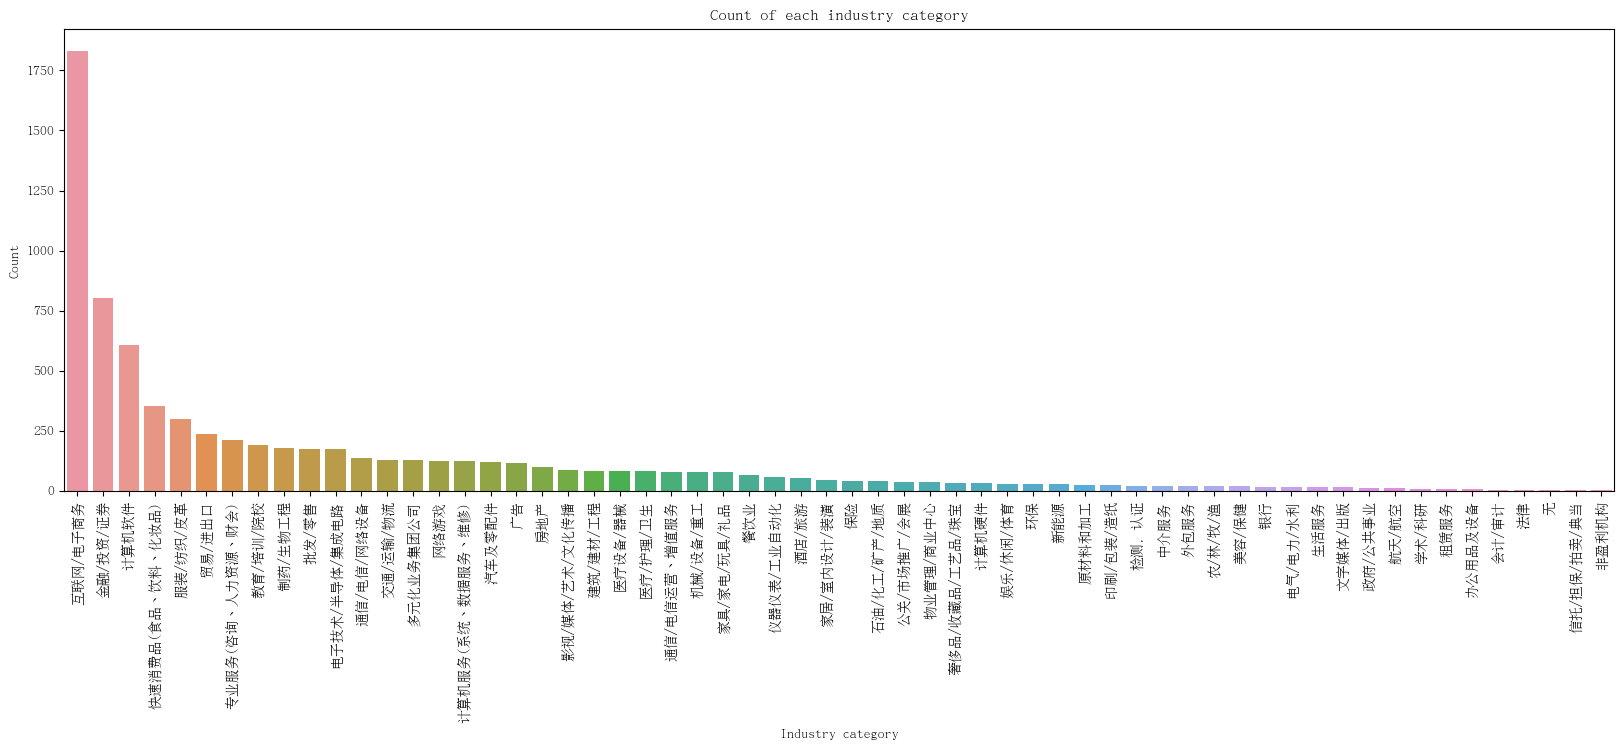

In [6]:
# 将上述结果进行可视化

plt.rcParams['font.family'] = ['AR PL UMing CN']

plt.figure(figsize=(20, 6))
# df_industry.groupby(['行业类别']).count()['count'].sort_values(ascending=False).plot(kind='bar')

# industry_categories_count.plot(kind='bar')
sns.barplot(x=industry_categories_count.index, y=industry_categories_count['count'])
plt.xlabel('Industry category')
plt.ylabel('Count')
plt.title('Count of each industry category')
plt.xticks(rotation=90)
plt.show()

# 除去中频次最高的5个行业类别, 绘制剩余行业的词云图;

/tmp/ipykernel_3325/843723247.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask=imread(r'./Neuro-sama.png')


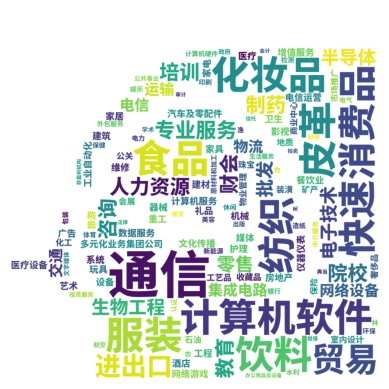

In [7]:
# 绘制词云

industry_categories_count_data_Temp = industry_categories_count.copy()

# 将 industry_categories_count_data 中的 '互联网/电子商务' 和 '金融/投资/证券' 删除
industry_categories_count_data_Temp.drop('互联网/电子商务', inplace=True)
industry_categories_count_data_Temp.drop('金融/投资/证券', inplace=True)

industry_categories_count_data_Temp.to_csv('ForWordCloud.txt', sep='\t', header=False)

industry_categories_count_data = open('ForWordCloud.txt', encoding='utf-8').read()

wordCloud = wordcloud.WordCloud(
    background_color="white",
    width=1080,
    height=1080,
    font_path='./NotoSansSC-ExtraBold.ttf',
    mask=imread(r'./Neuro-sama.png')
)

wordCloud.generate(industry_categories_count_data)

plt.imshow(wordCloud)
plt.axis('off')
plt.show()

wordCloud.to_file('WordCloud.png')

# 以对数平均薪资为对象, 进行简单的描述分析;

/tmp/ipykernel_3325/990864646.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8962.375433122468' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_meaningful_salary.at[index, "Logarithmic mean"] = ((df_meaningful_salary.at[index, "最高薪资"] - df_meaningful_salary.at[index, "最低薪资"]) / (np.log(df_meaningful_salary.at[index, "最高薪资"]) - np.log(df_meaningful_salary.at[index, "最低薪资"])))
/tmp/ipykernel_3325/990864646.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_meaningful_salary['Logarithmic mean'], bins=100)
/home/ben/anac

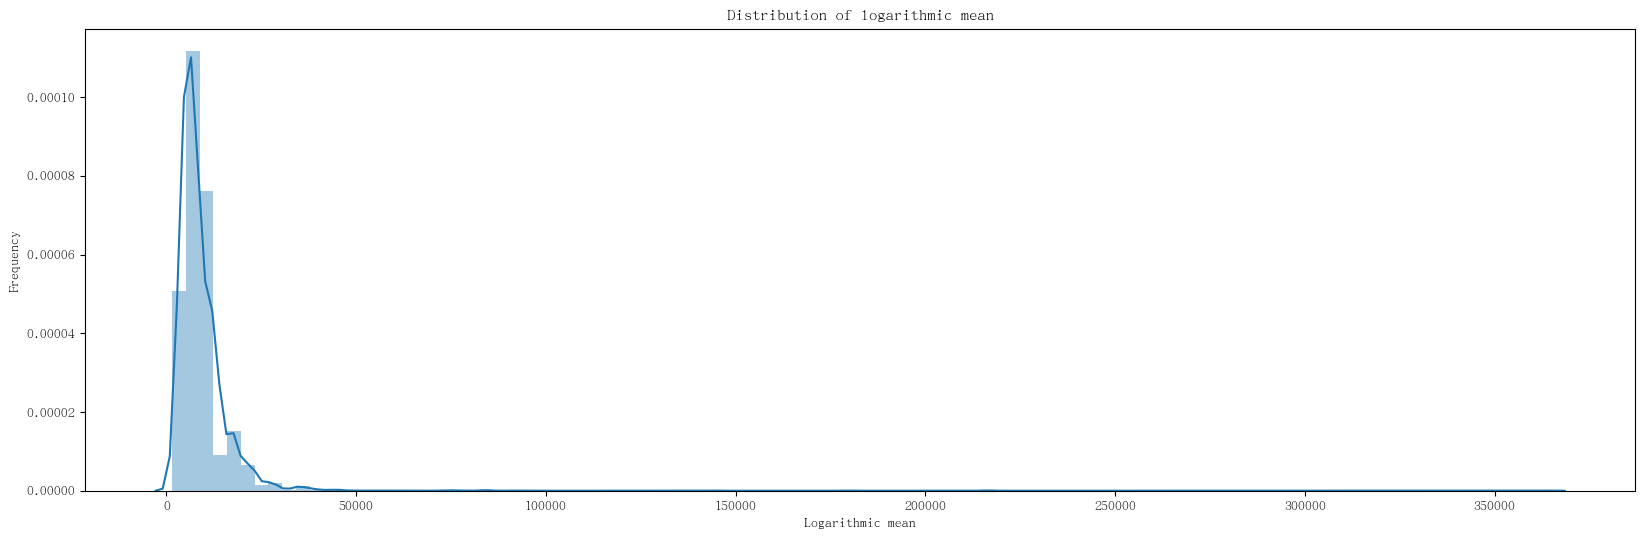

The highest salary:  364095.3327683922
The lowest salary:  1500.0


/tmp/ipykernel_3325/990864646.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_meaningful_salary['Logarithmic mean'], bins=100)
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opt

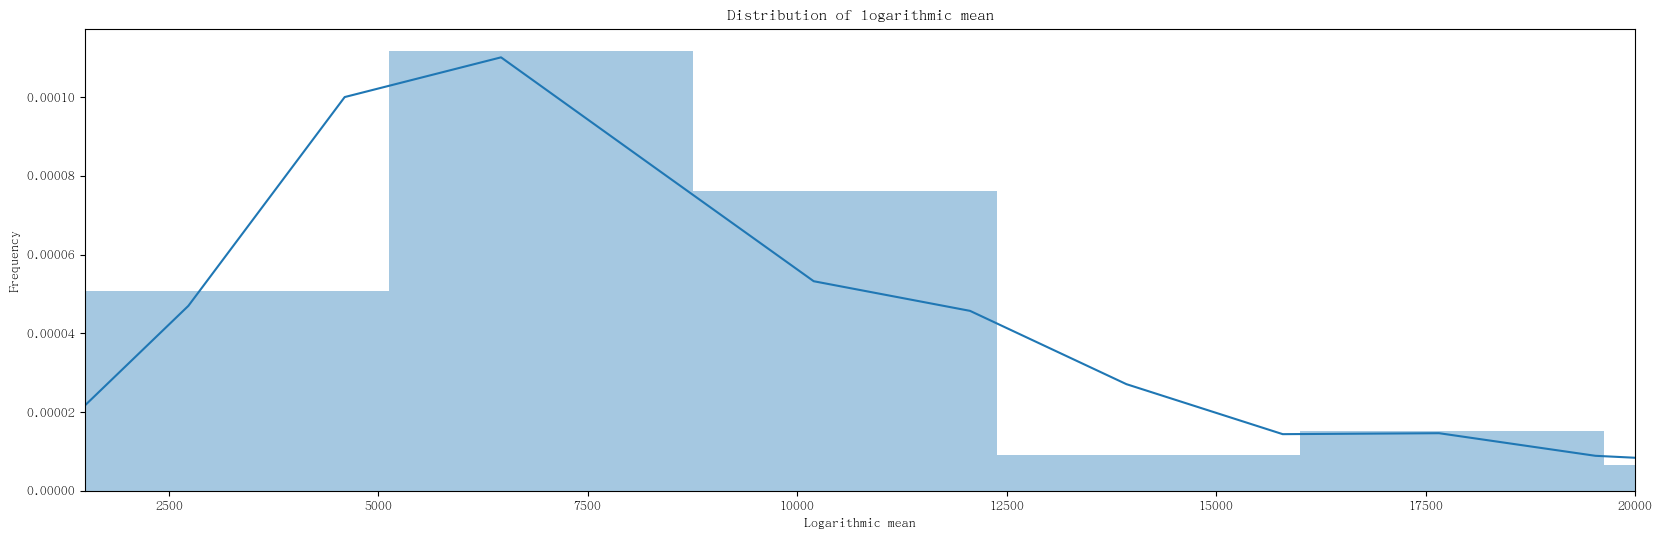

In [8]:
# 用 df_meaningful_salary 新建一列: "Logarithmic mean", 并将其薪资的对数值赋值给该列
df_meaningful_salary["Logarithmic mean"] = 0

for index, row in df_meaningful_salary.iterrows():
    if row['最低薪资'] == row['最高薪资']:
        df_meaningful_salary.at[index, "Logarithmic mean"] = df_meaningful_salary.at[index, "最低薪资"]
    else:
        df_meaningful_salary.at[index, "Logarithmic mean"] = ((df_meaningful_salary.at[index, "最高薪资"] - df_meaningful_salary.at[index, "最低薪资"]) / (np.log(df_meaningful_salary.at[index, "最高薪资"]) - np.log(df_meaningful_salary.at[index, "最低薪资"])))

# df_meaningful_salary['Logarithmic mean'] = ((df_meaningful_salary['最高薪资'] - df_meaningful_salary['最低薪资']) / (np.log(df_meaningful_salary['最高薪资']) - np.log(df_meaningful_salary['最低薪资'])))

# 将 df_meaningful_salary 中的 "Logarithmic mean" 列进行可视化
# 平均薪资的分布直方图
plt.figure(figsize=(20, 6))
sns.distplot(df_meaningful_salary['Logarithmic mean'], bins=100)
plt.xlabel('Logarithmic mean')
plt.ylabel('Frequency')
plt.title('Distribution of logarithmic mean')
plt.show()

# 打印出薪资最高和薪资最低的
print('The highest salary: ', df_meaningful_salary['Logarithmic mean'].max())
print('The lowest salary: ', df_meaningful_salary['Logarithmic mean'].min())

# 截取上图中1500-20000的部分, 并特别通过向下的垂直的连线在x轴上标出折线图中的最高点
plt.figure(figsize=(20, 6))
sns.distplot(df_meaningful_salary['Logarithmic mean'], bins=100)
plt.xlim(1500, 20000)
plt.xlabel('Logarithmic mean')
plt.ylabel('Frequency')
plt.title('Distribution of logarithmic mean')
plt.show()

In [9]:
def calculate_salary(df_input, column_name, rotation):
    # 计算各地域或行业的平均薪资
    # 新建一个空 DataFrame 用于储存地域或行业及其平均薪资
    df_salary = pd.DataFrame(columns=[column_name, 'count', 'mean'])

    df_salary[column_name] = df_input[column_name].unique()
    df_salary = df_salary.set_index(column_name)
    df_salary['mean'] = 0
    df_salary['count'] = 0

    # 遍历 df 的数据, 检查其地域或行业类型, 在相应 count 中+1, 并将其 Logarithmic mean 与 df_salary 中的 mean 相对 count 求均值
    for index, row in df_input.iterrows():
            df_salary.at[row[column_name], 'count'] += 1
            df_salary.at[row[column_name], 'mean'] = (df_salary.at[row[column_name], 'mean'] * (df_salary.at[row[column_name], 'count'] - 1) + row['Logarithmic mean']) / df_salary.at[row[column_name], 'count']

    # 处理 df_salary, 实现四舍五入, 并转换为整数形式, 并按照薪资大小进行排序
    for index, row in df_salary.iterrows():
        df_salary.at[index, 'mean'] = round(df_salary.at[index, 'mean'])
        df_salary.at[index, 'mean'] = int(df_salary.at[index, 'mean'])

    df_salary = df_salary.sort_values(by='mean', ascending=False)

    # 画出直方图
    plt.figure(figsize=(20, 6))
    sns.barplot(x=df_salary.index, y=df_salary['mean'])
    plt.xlabel(column_name)
    plt.ylabel('Logarithmic mean')
    plt.title('Logarithmic mean of each ' + column_name)
    if rotation:
        plt.xticks(rotation=90)
    plt.show()

    return df_salary

/tmp/ipykernel_3325/1377061915.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8962.375433122468' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_salary.at[row[column_name], 'mean'] = (df_salary.at[row[column_name], 'mean'] * (df_salary.at[row[column_name], 'count'] - 1) + row['Logarithmic mean']) / df_salary.at[row[column_name], 'count']
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vec

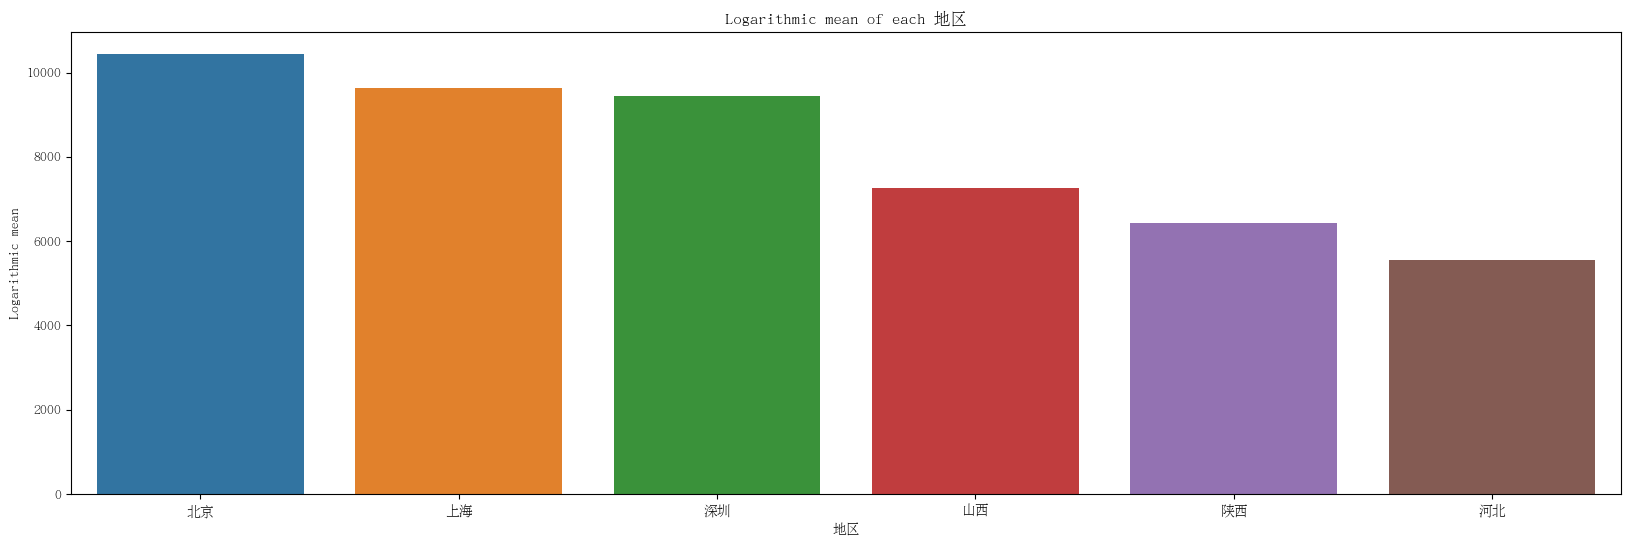

,count,mean
地区,,
北京,1070,10438.0
上海,3138,9642.0
深圳,1636,9432.0
山西,200,7254.0
陕西,487,6423.0
河北,580,5557.0


In [10]:
# 计算各地域的平均薪资
calculate_salary(df_meaningful_salary, '地区', False)

/tmp/ipykernel_3325/1377061915.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8962.375433122468' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_salary.at[row[column_name], 'mean'] = (df_salary.at[row[column_name], 'mean'] * (df_salary.at[row[column_name], 'count'] - 1) + row['Logarithmic mean']) / df_salary.at[row[column_name], 'count']
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vec

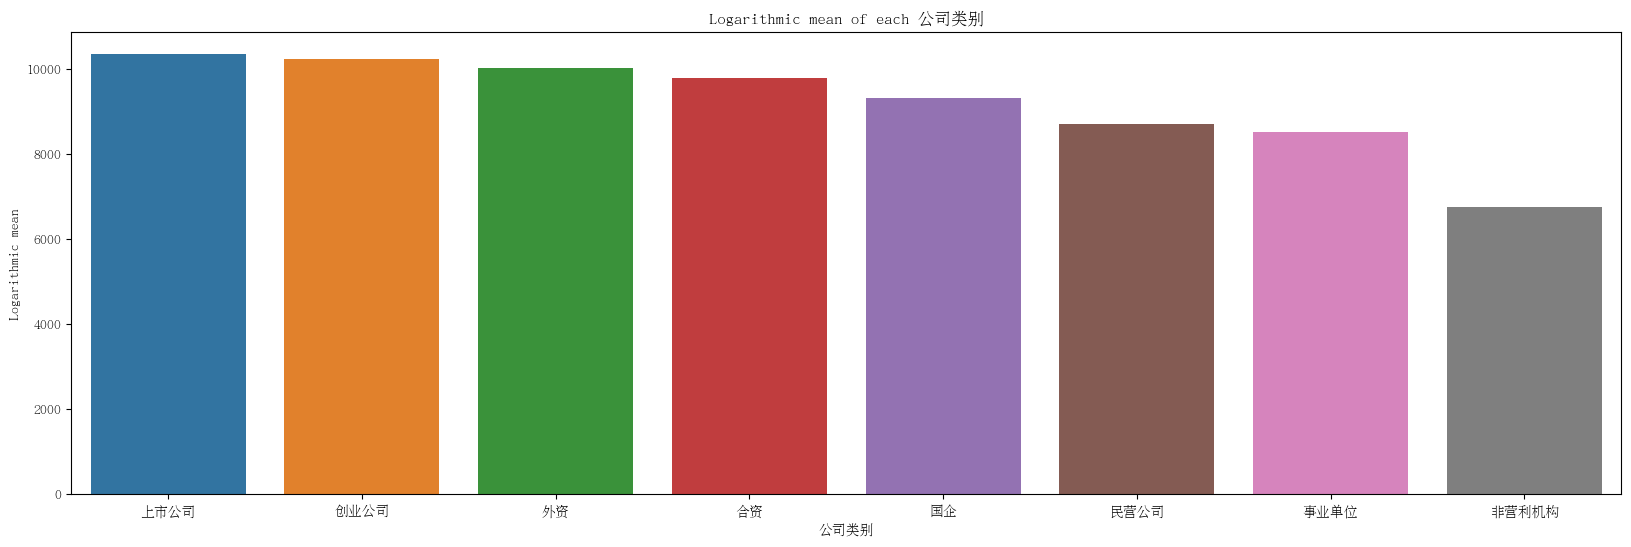

,count,mean
公司类别,,
上市公司,380,10351.0
创业公司,90,10255.0
外资,796,10025.0
合资,735,9802.0
国企,254,9322.0
民营公司,4823,8708.0
事业单位,15,8521.0
非营利机构,18,6762.0


In [11]:
# 计算公司规模与平均薪资关系
calculate_salary(df_meaningful_salary, '公司类别', False)

/tmp/ipykernel_3325/1377061915.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8962.375433122468' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_salary.at[row[column_name], 'mean'] = (df_salary.at[row[column_name], 'mean'] * (df_salary.at[row[column_name], 'count'] - 1) + row['Logarithmic mean']) / df_salary.at[row[column_name], 'count']
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vec

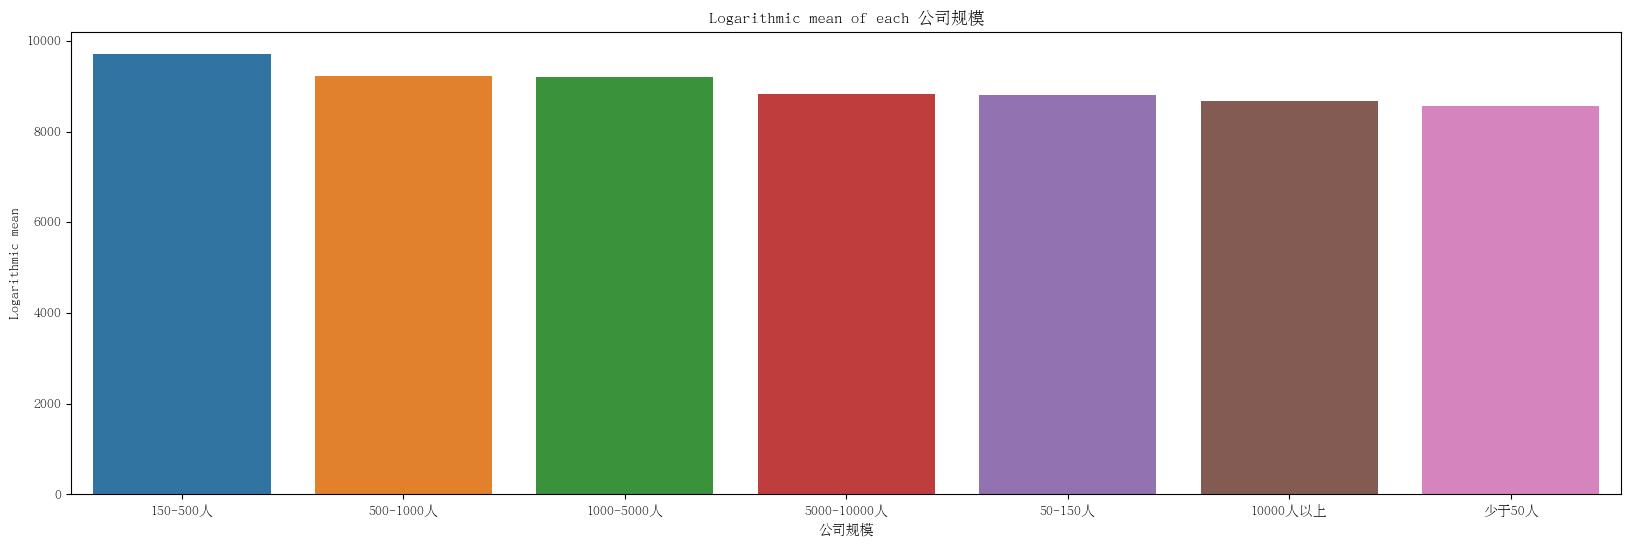

,count,mean
公司规模,,
150-500人,1825,9705.0
500-1000人,869,9220.0
1000-5000人,791,9197.0
5000-10000人,154,8836.0
50-150人,2155,8809.0
10000人以上,262,8677.0
少于50人,1055,8572.0


In [12]:
# 计算公式规模与平均薪资关系
calculate_salary(df_meaningful_salary, '公司规模', False)

/tmp/ipykernel_3325/1377061915.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8962.375433122468' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_salary.at[row[column_name], 'mean'] = (df_salary.at[row[column_name], 'mean'] * (df_salary.at[row[column_name], 'count'] - 1) + row['Logarithmic mean']) / df_salary.at[row[column_name], 'count']
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vec

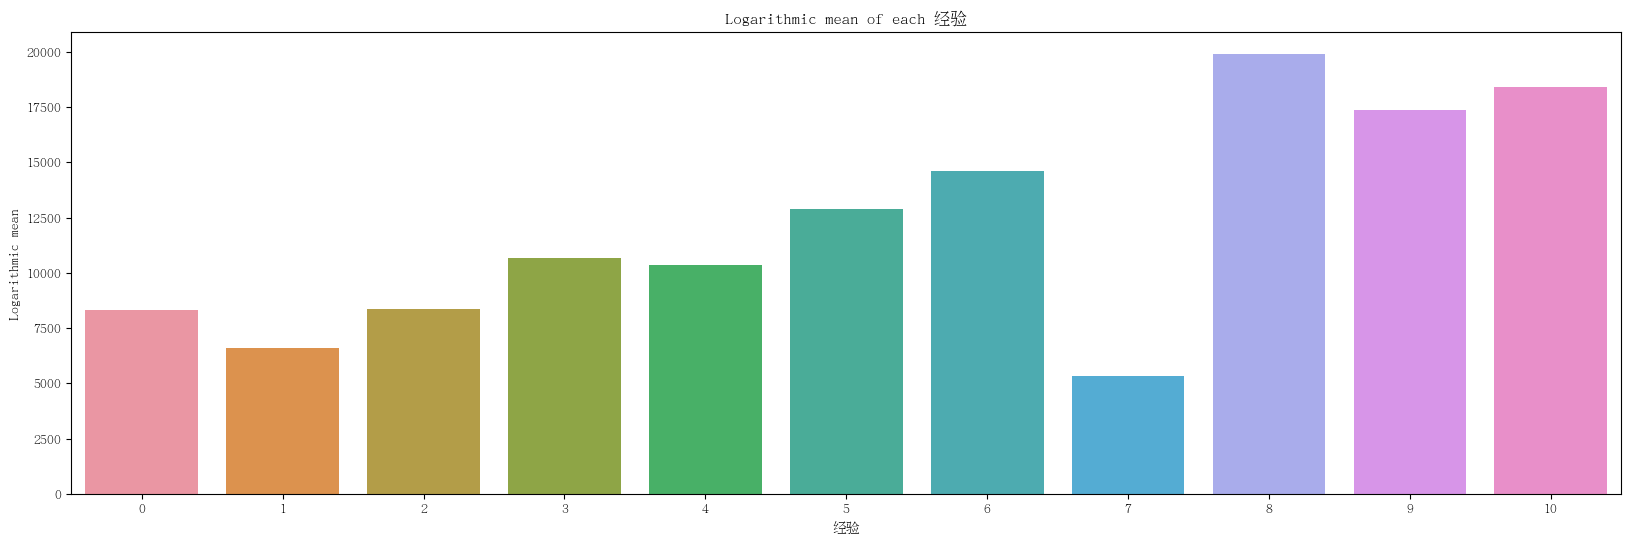

,count,mean
经验,,
8,74,19918.0
10,29,18426.0
9,1,17380.0
6,346,14627.0
5,190,12898.0
3,1470,10691.0
4,11,10357.0
2,1407,8355.0
0,2233,8329.0


In [13]:
# 计算人员经验与其获得的平均薪资关系
calculate_salary(df_meaningful_salary, '经验', False)

/tmp/ipykernel_3325/1377061915.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8962.375433122468' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_salary.at[row[column_name], 'mean'] = (df_salary.at[row[column_name], 'mean'] * (df_salary.at[row[column_name], 'count'] - 1) + row['Logarithmic mean']) / df_salary.at[row[column_name], 'count']
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vec

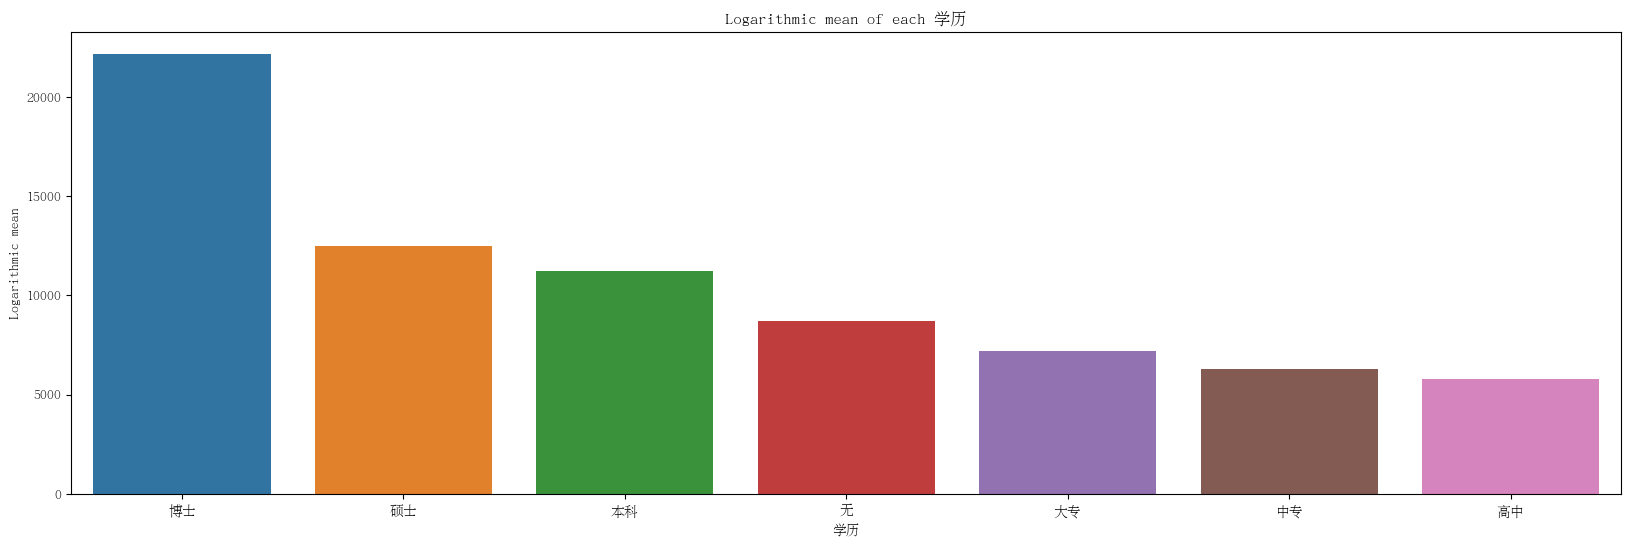

,count,mean
学历,,
博士,13,22164.0
硕士,166,12500.0
本科,2831,11202.0
无,898,8691.0
大专,2938,7206.0
中专,156,6268.0
高中,109,5769.0


In [14]:
# 计算学历与其获得的平均薪资关系
calculate_salary(df_meaningful_salary, '学历', False)

/tmp/ipykernel_3325/1377061915.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8962.375433122468' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_salary.at[row[column_name], 'mean'] = (df_salary.at[row[column_name], 'mean'] * (df_salary.at[row[column_name], 'count'] - 1) + row['Logarithmic mean']) / df_salary.at[row[column_name], 'count']
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vec

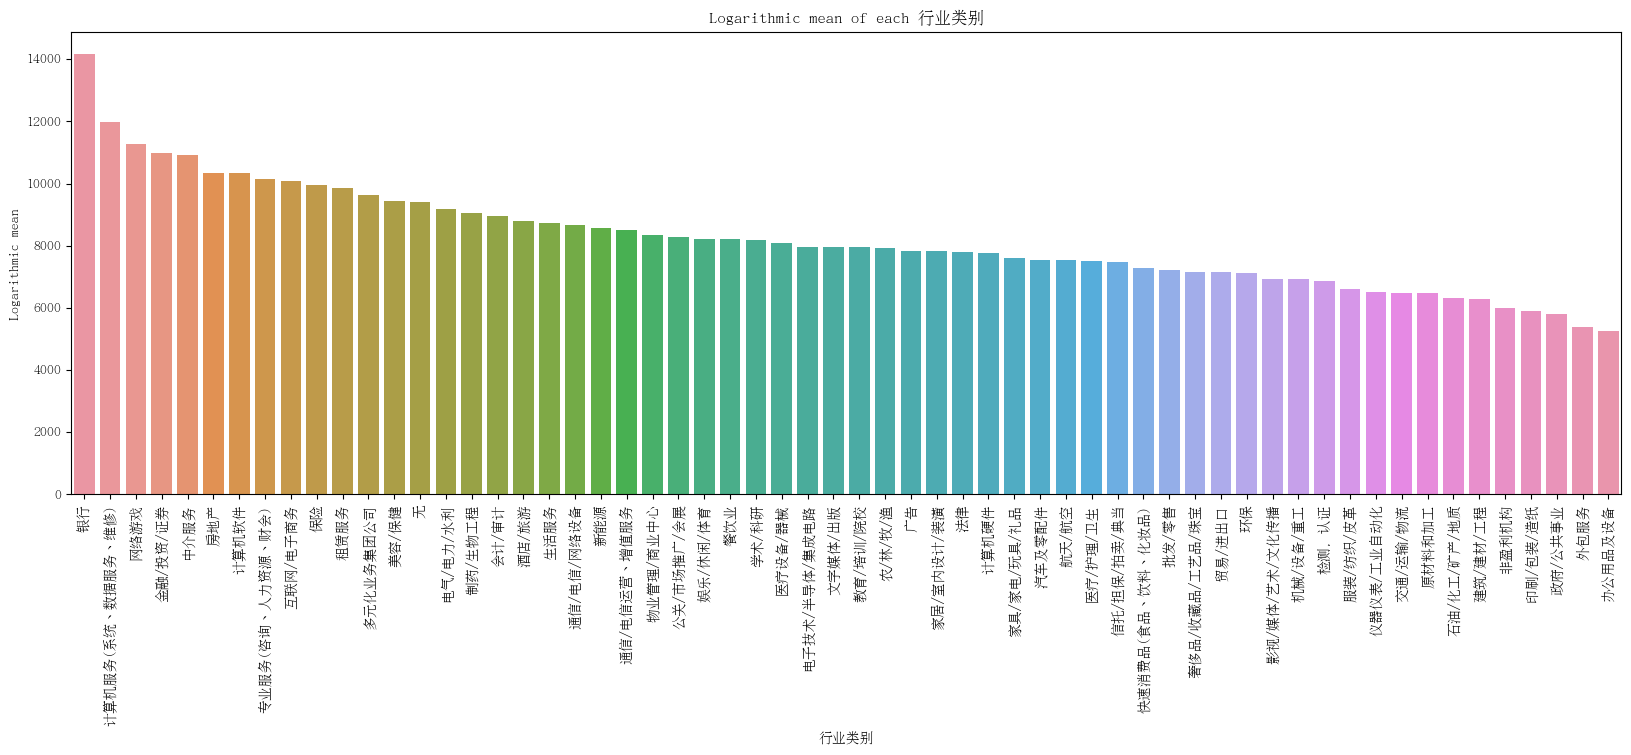

,count,mean
行业类别,,
银行,14,14151.0
计算机服务(系统、数据服务、维修),118,11973.0
网络游戏,123,11279.0
金融/投资/证券,770,10968.0
中介服务,17,10927.0
房地产,98,10342.0
计算机软件,587,10325.0
专业服务(咨询、人力资源、财会),204,10155.0
互联网/电子商务,1788,10075.0


In [15]:
# 计算行业类别与平均薪资关系
calculate_salary(df_meaningful_salary, '行业类别', True)

# 5. 使用箱线图, 探究学历对岗位薪资的影响, 对结果进行解读; 

In [75]:
# 寻找 deviated 数据
def eduction_salary_excel(Education_qualifications):
    df_eduction_salary_Temp = df_meaningful_salary.copy()
    df_eduction_salary_Temp = df_eduction_salary_Temp.loc[df_meaningful_salary['学历'].str.contains(Education_qualifications)]
    df_eduction_salary_Temp = df_eduction_salary_Temp.sort_values(by='Logarithmic mean', ascending=False)
    df_eduction_salary_Temp.to_excel(Education_qualifications + ".xlsx")

eduction_list = ['无','高中', '中专', '大专', '本科', '硕士', '博士']

for education in eduction_list:
    eduction_salary_excel(education)
    # exec(f'eduction_salary_{education} = pd.read_excel("{education}.xlsx")')

In [77]:
# eduction_salary_中专.head(10)

,Unnamed: 0,职位,公司名称,地区,公司类别,公司规模,行业类别,经验,学历,人数,描述,最低薪资,最高薪资,Logarithmic mean
0,6139,电商运营总监,深圳上云朵网络科技有限公司,深圳,民营公司,150-500人,互联网/电子商务,4,中专,招聘1人,年以上网店工作经验 中专专及以上学历 广告 市场营销 电子商务等相关专业 熟悉淘宝等网店平台...,20000.0,24999.0,22406.635791
1,4285,微信运营主管,澳纽乳制品（上海）有限公司,上海,外资,50-150人,快速消费品(食品、饮料、化妆品),0,中专,招聘2人,职位描述 负责微信公众号的运营和维护工作 提高粉丝关注度和活跃度 负责策划并制定微信线上活动...,3500.0,50000.0,17486.067310
2,1010,零基础免费带薪培训原油交易员金融精英,亿盛嘉德（北京）投资管理有限公司,北京,外资,500-1000人,金融/投资/证券,0,中专,招聘8人,职位描述 薪酬待遇 初级交易员 基本工资 元 + 岗位补贴 + 提成 + 年终奖 + 五险 ...,8000.0,20000.0,13096.280015
3,736,金融数据分析师助理+五险一金+双休,北京盛世鑫业投资发展有限公司,北京,民营公司,150-500人,金融/投资/证券,0,中专,招聘若干人,职位描述 常常有人问我 北京是一座怎样的城市 为什么快节奏 高消费 竞争激烈 压力大的北京 ...,10000.0,14999.0,12331.078555
4,7124,运营经理 /总监 (职位编号：04),深圳市赛诺电子商务有限公司,深圳,民营公司,50-150人,贸易/进出口,3,中专,招聘1人,岗位职责 负责公司出口商品的电商运营 制定公司的品牌运营发展战略 组织协调电商部门执行丶实现...,10000.0,14999.0,12331.078555
5,5272,淘宝网运营推广,上海实创金属制品有限公司,上海,民营公司,50-150人,机械/设备/重工,0,中专,招聘2人,岗位职责 负责店铺 宝贝运营要求设计 对店铺数据分析 制定运营计划 根据市场数据分析 制定品...,10000.0,14999.0,12331.078555
6,4910,股票分析师,上海浸荣投资咨询有限公司,上海,民营公司,150-500人,金融/投资/证券,0,中专,招聘2人,岗位职责 具有良好的语言表达能力 负责金融业主流趋势 热点 主题投资策略的分析 负责把握股票...,10000.0,14999.0,12331.078555
7,5873,金融交易员/数据分析师/挑战高薪/五险双休/地铁沿线 (职位编号：16),盛世佳汇投资（深圳）有限公司,深圳,合资,150-500人,金融/投资/证券,0,中专,招聘12人,本世纪的 金融巨鳄 乔治 索罗斯说 你可以生于贫穷 但绝不能死于贫穷 思路决定你的出路 脑袋...,10000.0,14999.0,12331.078555
8,4860,渠道经理,上海圣峰建材科技股份有限公司,上海,民营公司,50-150人,建筑/建材/工程,2,中专,无,岗位职责 负责所在区域经销商开发及维护管理工作 负责对竞品的产品性能 价格 促销手段 广告策...,10000.0,14999.0,12331.078555
9,1132,销售经理,石家庄时代互动科技有限公司,河北,民营公司,50-150人,互联网/电子商务,4,中专,无,从销售及客户需求的角度 对产品的研发提供指导性建议 贯彻 执行公司销售政策及流程 根据销售任...,10000.0,14999.0,12331.078555


In [66]:
# # 定义函数以通过输入数字删除 df_eduction_salary 中的最上面N行
# def delete_top_N_rows(eduction, N):
#     df_eduction_salary = education.iloc[N:]
#     return df_eduction_salary

/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Logarithmic mean of each education')

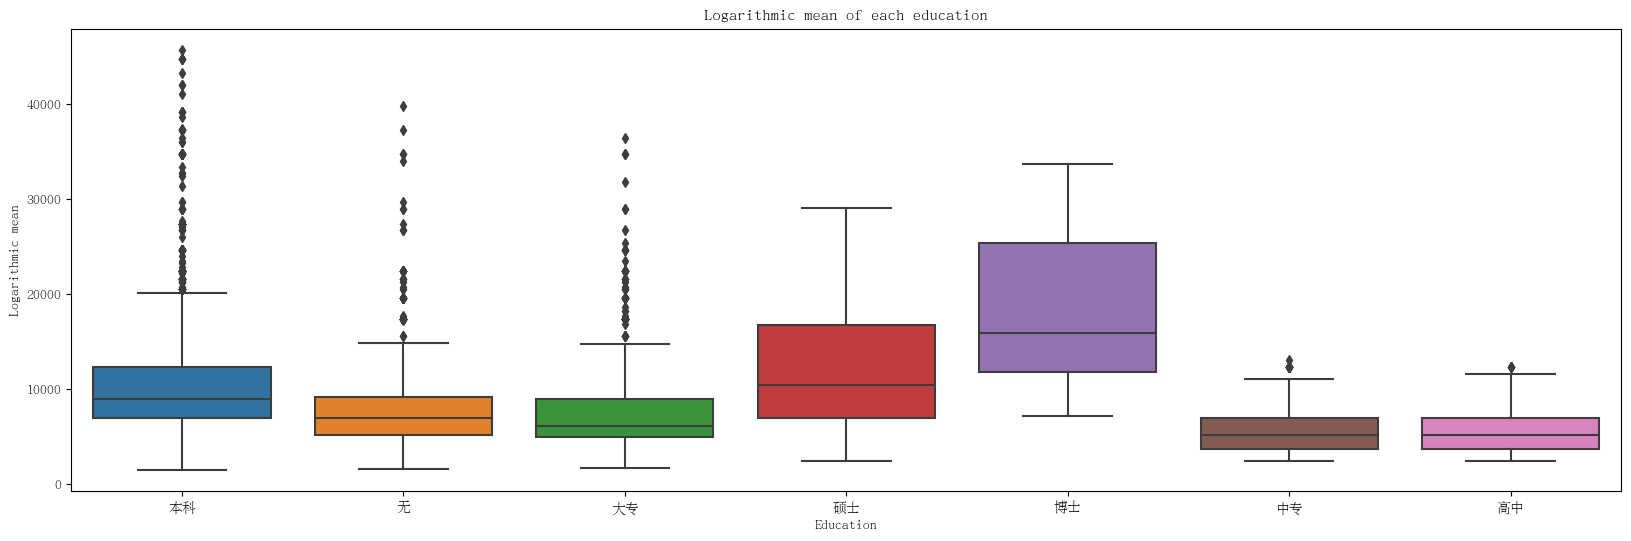

In [68]:
df_eduction_salary = df_meaningful_salary.copy()

# 删除 deviated 数据
education_drop_list = [470, 6420, 425, 211, 1856, 378, 4456, 3072, 482, 6838, 6283, 5952, 3478, 2389, 4367, 5122, 902, 6962, 2672, 5049, 4638, 6139, 4285, 6346]

for index in education_drop_list:
    df_eduction_salary.drop(index=index, inplace=True)

# 绘制直方图
plt.figure(figsize=(20, 6))
sns.boxplot(x='学历', y='Logarithmic mean', data=df_eduction_salary)
plt.xlabel('Education')
plt.ylabel('Logarithmic mean')
plt.title('Logarithmic mean of each education')

# 6. 从岗位描述中提取对软件的要求, 并使用箱线图展示不同软件要求对薪资的影响

> 提示: 这些职位要求的软件不外乎R、SPSS、Excel、Python、MATLAB、Java、SQL、SAS、Stata、EViews、Spark、Hadoop这12种; 

In [18]:
import re
import os
import enchant

df_software_skill = df_meaningful_salary.copy()

df_software_skill['软件要求'] = ''
software_skill_list = ['spss', 'excel', 'python', 'matlab', 'java', 'sql', 'sas', 'stata', 'eviews', 'spark', 'hadoop', 'office']

my_dict_list = ['spss', 'excel', 'python', 'matlab', 'java', 'sql', 'sas', 'stata', 'eviews', 'spark', 'hadoop', 'mysql']

# 清理数据
if os.path.exists('./my_dict.txt'):
    os.remove('./my_dict.txt')

# 新建 enchant 的个人词典
pwl = enchant.request_pwl_dict("./my_dict.txt")
for skill in my_dict_list:
    pwl.add(skill)

# 字段处理, "描述"列中仅保留英文单词, 其余字符删除
# 定义正则表达式模式，用于匹配非英文单词字符
pattern = re.compile(r'[^a-zA-Z]')
# 将"描述"列中的非英文单词字符替换为空格
for index, row in df_software_skill.iterrows():
    df_software_skill.at[index, '描述'] = pattern.sub(' ', row['描述'])
    words_list = df_software_skill.at[index, '描述'].split()
    words = " ".join(words_list)
    df_software_skill.at[index, '描述'] = words

# 对'描述'列中的文本进行拼写检查
d = enchant.DictWithPWL("en_US", "my_dict.txt")
for index, row in df_software_skill.iterrows():
    words = []
    for word in row['描述'].split():
        if d.check(word):
            words.append(word)
        else:
            suggestions = d.suggest(word)
            if len(suggestions) > 0:
                words.append(suggestions[0])
            else:
                words.append(word)
    if words != []:
        replacement = ' '.join(words)
        df_software_skill.at[index, '描述'] = replacement

# 遍历列表 software_skill_list 中的元素，对应 software_skill_list 将其添加到 DataFrame df_software_skill 的 '软件要求' 列中
for requirement in software_skill_list:
    pattern_list = re.escape(requirement)
    if requirement == 'office':
        df_software_skill.loc[df_software_skill['描述'].str.contains(pattern_list, flags=re.I, regex=True), '软件要求'] += ('excel' + ' ')
    elif requirement == 'mysql':
        df_software_skill.loc[df_software_skill['描述'].str.contains(pattern_list, flags=re.I, regex=True), '软件要求'] += ('sql' + ' ')
    else:
        df_software_skill.loc[df_software_skill['描述'].str.contains(pattern_list, flags=re.I, regex=True), '软件要求'] += (requirement + ' ')

pattern_r = r'(?<![a-zA-Z])' + 'r' + r'(?![a-zA-Z])'
df_software_skill.loc[df_software_skill['描述'].str.contains(pattern_r, flags=re.I, regex=True), '软件要求'] += ('r' + ' ')

# 计算 '软件要求' 个数, 并添加到 '软件要求_count' 列中
df_software_skill['软件要求_count'] = df_software_skill['软件要求'].str.split().str.len()

df_software_skill.to_excel('software_skill.xlsx')

df_software_skill

,职位,公司名称,地区,公司类别,公司规模,行业类别,经验,学历,人数,描述,最低薪资,最高薪资,Logarithmic mean,软件要求,软件要求_count
0,万向联合诚聘金融交易助理/数据分析 期待你的加入,北京万向联合控股集团有限公司,北京,合资,150-500人,金融/投资/证券,0,本科,招聘10人,l l l l,8000.0,9999.0,8962.375433,,0
1,数据分析师,酷我音乐,北京,外资,150-500人,互联网/电子商务,3,无,招聘1人,excel spss,10000.0,14999.0,12331.078555,spss excel,2
2,QA 数据分析,北京互联企信信息技术有限公司,北京,外资,1000-5000人,外包服务,0,大专,招聘1人,excel opt,4500.0,5999.0,5213.633921,excel,1
3,数据分析师 (职位编号：yunshan002894),美菜网,北京,外资,1000-5000人,互联网/电子商务,3,大专,招聘1人,,6000.0,10000.0,7830.460756,,0
4,高级数据分析师/SAS工程师,博易智软（北京）技术股份有限公司,北京,上市公司,150-500人,计算机软件,3,本科,招聘2人,sas sql,15000.0,19999.0,17379.842168,sql sas,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7384,运营主管,北京恒昌利通投资管理有限公司,深圳,民营公司,10000人以上,互联网/电子商务,3,本科,招聘1人,p p,8000.0,12000.0,9865.213850,,0
7385,手机产品经理（大型上市公司，待遇丰厚）,深圳市拓仕企业管理顾问有限公司,深圳,合资,50-150人,专业服务(咨询、人力资源、财会),2,无,招聘2人,peba dom Qq mkt Qualcomm excel opt word vision...,15000.0,19999.0,17379.842168,excel,1
7386,电商产品分析专员,深圳市恒辉达实业有限公司,深圳,民营公司,500-1000人,家居/室内设计/装潢,1,无,招聘1人,,4500.0,5999.0,5213.633921,,0
7387,天猫推广运营,深圳市遇见文化发展有限公司,深圳,民营公司,150-500人,服装/纺织/皮革,2,大专,招聘1人,IP pc,6000.0,7999.0,6951.663672,,0


/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Logarithmic mean of each number of software')

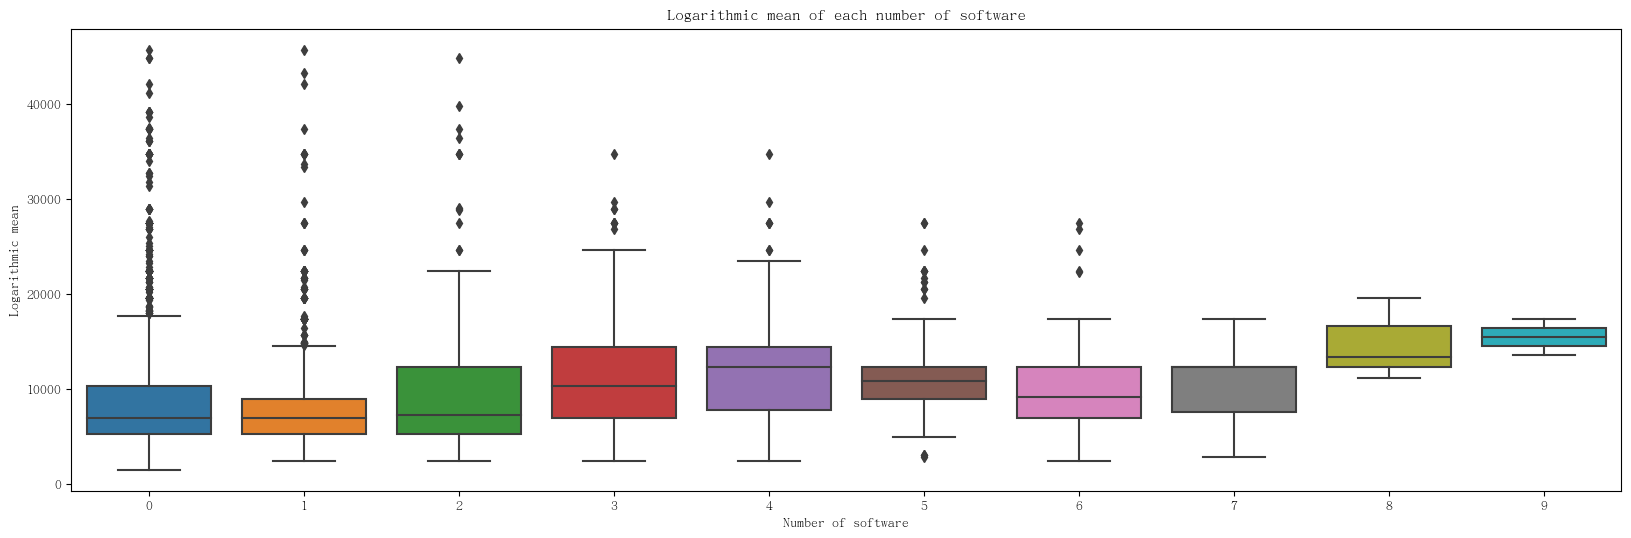

In [19]:
df_software_skill_salary = df_software_skill.copy()

# 寻找 deviated 数据
def software_salary_excel(Software_skill):
    df_software_salary_Temp = df_meaningful_salary.copy()
    df_software_salary_Temp = df_software_salary_Temp.loc[df_software_skill_salary['软件要求_count'].astype(int).eq(Software_skill)]
    df_software_salary_Temp = df_software_salary_Temp.sort_values(by='Logarithmic mean', ascending=False)
    df_software_salary_Temp.to_excel("掌握软件" + str(Software_skill) + ".xlsx")

software_list = [0, 1, 2, 3, 4, 5, 6 , 7, 8, 9]

for software in software_list:
    software_salary_excel(software)

# 删除 deviated 数据
software_drop_list = [470, 1856, 2389, 4456, 4367, 6420, 6838, 6283, 6962, 5122, 902, 3478, 425, 378, 211, 3072, 5952, 482, 2725, 3452]

for index in software_drop_list:
    df_software_skill_salary.drop(index=index, inplace=True)

# 掌握软件个数与薪资的关系
plt.figure(figsize=(20, 6))
sns.boxplot(x='软件要求_count', y='Logarithmic mean', data=df_software_skill_salary)
plt.xlabel('Number of software')
plt.ylabel('Logarithmic mean')
plt.title('Logarithmic mean of each number of software')

# 7. 以对数平均薪资为因变量, 以地区、公司类别、公司规模、学历、经验要求以及12种软件需求为自变量, 建立线性回归模型, 探求这些比变量对于薪资的影响

In [20]:
df_meaningful_salary_independent_var = df_meaningful_salary.copy()
df_meaningful_salary_independent_var['软件要求_count'] = df_software_skill['软件要求_count']

def linear_regression(independent_var, dummy_order):
    """
    Perform linear regression on the given independent variable and dummy variable order.

    Parameters:
    independent_var (str): The name of the independent variable to use.
    dummy_order (list): The order of the dummy variables to use.

    Returns:
    summary (str): The summary of the linear regression model.
    """
    
    # 将地区名转换为哑变量
    dummy_independent_var = pd.get_dummies(df_meaningful_salary_independent_var[independent_var], prefix=independent_var).astype(int)
    dummy_independent_var = dummy_independent_var.reindex(columns=dummy_order) # 重新排列哑变量的顺序
    dummy_independent_var.drop(dummy_order[0], axis=1, inplace=True) # 删除第一个哑变量

    # 将哑变量和原始数据合并
    df_meaningful_salary_independent_var_merged = pd.concat([df_meaningful_salary_independent_var, dummy_independent_var], axis=1)

    # 删除不需要的列(前12列)
    df_meaningful_salary_independent_var_merged.drop(df_meaningful_salary_independent_var_merged.columns[:12], axis=1, inplace=True)

    # 定义因变量和自变量
    y = df_meaningful_salary_independent_var_merged['Logarithmic mean']
    X = df_meaningful_salary_independent_var_merged.drop('Logarithmic mean', axis=1)

    # 添加截距项
    X = sm.add_constant(X)
    # 建立模型
    model = sm.OLS(y, X).fit()
    # 输出模型结果
    return model.summary()

In [21]:
# 地区
linear_regression('地区', ["地区_山西", "地区_上海", "地区_北京", "地区_陕西", "地区_河北", "地区_深圳"])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Logarithmic mean   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     41.81
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.18e-50
Time:                        20:26:00   Log-Likelihood:                -74370.
No. Observations:                7111   AIC:                         1.488e+05
Df Residuals:                    7104   BIC:                         1.488e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7087.2199    596.826     11.875      0.000    5917.263    8257.177
软件要求_count   521.4346     75.759      6.883      0.000     372.924     669.945
地区_上海       2101.4544    616.452      3.409      0.001     893.025    3309.884
地区_北京       2533.0791    656.526      3.858      0.000    1246.093    3820.065
地区_陕西       -950.3688    708.488     -1.341      0.180   -2339.217     438.479
地区_河北      -1661.9020    691.568     -2.403      0.016   -3017.581    -306.223
地区_深圳       2008.3173    632.215      3.177      0.001     768.988    3247.646
==============================================================================
Omnibus:                    14886.094   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         99571849.072
Skew:                          17.686   Prob(JB):                         0.00
Kurtosis:                     581.627   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# 公司类别
linear_regression('公司类别', ['公司类别_合资' '公司类别_外资' '公司类别_上市公司' '公司类别_民营公司' '公司类别_国企' '公司类别_非营利机构' '公司类别_创业公司' '公司类别_事业单位'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Logarithmic mean   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     88.00
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           8.64e-21
Time:                        20:26:00   Log-Likelihood:                -74449.
No. Observations:                7111   AIC:                         1.489e+05
Df Residuals:                    7109   BIC:                         1.489e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8513.8660    118.442     71.882      0.000    8281.683    8746.048
软件要求_count   692.9419     73.869      9.381      0.000     548.137     837.747
==============================================================================
Omnibus:                    14723.843   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         93003611.501
Skew:                          17.247   Prob(JB):                         0.00
Kurtosis:                     562.198   Cond. No.                         2.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# 公司规模
linear_regression('公司规模', ['公司规模_150-500人', '公司规模_1000-5000人', '公司规模_500-1000人', '公司规模_50-150人', '公司规模_少于50人', '公司规模_10000人以上', '公司规模_5000-10000人'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Logarithmic mean   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     14.52
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           6.75e-19
Time:                        20:26:00   Log-Likelihood:                -74443.
No. Observations:                7111   AIC:                         1.489e+05
Df Residuals:                    7103   BIC:                         1.490e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9105.3367    209.800     43.400      0.000    8694.067    9516.606
软件要求_count         683.0972     74.157      9.212      0.000     537.728     828.466
公司规模_1000-5000人   -607.4033    362.893     -1.674      0.094   -1318.782     103.976
公司规模_500-1000人    -555.5259    351.273     -1.581      0.114   -1244.126     133.074
公司规模_50-150人      -786.8692    271.323     -2.900      0.004   -1318.742    -254.996
公司规模_少于50人        -996.6065    329.880     -3.021      0.003   -1643.270    -349.943
公司规模_10000人以上    -1131.9657    563.057     -2.010      0.044   -2235.725     -28.207
公司规模_5000-10000人  -912.7584    715.032     -1.277      0.202   -2314.433     488.917
==============================================================================
Omnibus:                    14712.702   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         92540415.421
Skew:                          17.217   Prob(JB):                         0.00
Kurtosis:                     560.802   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# 学历
linear_regression('学历', ['学历_无', '学历_高中', '学历_中专', '学历_大专', '学历_本科', '学历_硕士', '学历_博士'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Logarithmic mean   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     64.08
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           6.90e-90
Time:                        20:26:00   Log-Likelihood:                -74275.
No. Observations:                7111   AIC:                         1.486e+05
Df Residuals:                    7103   BIC:                         1.486e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8491.2144    281.636     30.150      0.000    7939.123    9043.306
软件要求_count   322.0675     75.155      4.285      0.000     174.741     469.394
学历_高中      -2805.3354    844.626     -3.321      0.001   -4461.054   -1149.616
学历_中专      -2343.1288    722.169     -3.245      0.001   -3758.796    -927.462
学历_大专      -1445.7580    317.493     -4.554      0.000   -2068.139    -823.377
学历_本科       2306.6959    322.295      7.157      0.000    1674.901    2938.491
学历_硕士       3477.5077    707.397      4.916      0.000    2090.799    4864.217
学历_博士        1.35e+04   2325.003      5.806      0.000    8941.745    1.81e+04
==============================================================================
Omnibus:                    15093.742   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        111303588.510
Skew:                          18.247   Prob(JB):                         0.00
Kurtosis:                     614.820   Cond. No.                         41.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# 经验要求
linear_regression('经验', ['经验_2', '经验_0', '经验_1', '经验_3', '经验_4', '经验_5', '经验_6', '经验_7', '经验_8', '经验_9'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Logarithmic mean   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     63.85
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          5.28e-125
Time:                        20:26:00   Log-Likelihood:                -74187.
No. Observations:                7111   AIC:                         1.484e+05
Df Residuals:                    7100   BIC:                         1.485e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7898.4081    226.032     34.944      0.000    7455.319    8341.497
软件要求_count   742.5915     71.331     10.410      0.000     602.761     882.422
经验_0        -209.1206    278.115     -0.752      0.452    -754.309     336.068
经验_1       -1876.2106    311.853     -6.016      0.000   -2487.536   -1264.886
经验_3        2169.5216    305.072      7.112      0.000    1571.489    2767.554
经验_4        2053.7666   2488.536      0.825      0.409   -2824.506    6932.039
经验_5        4358.1413    634.702      6.866      0.000    3113.935    5602.347
经验_6        6289.0185    492.833     12.761      0.000    5322.918    7255.118
经验_7       -2573.0681   5818.020     -0.442      0.658    -1.4e+04    8831.985
经验_8        1.159e+04    980.317     11.821      0.000    9666.520    1.35e+04
经验_9        9481.4340   8224.817      1.153      0.249   -6641.660    2.56e+04
==============================================================================
Omnibus:                    15407.430   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        126449525.183
Skew:                          19.143   Prob(JB):                         0.00
Kurtosis:                     655.156   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# 软件需求
linear_regression('软件要求_count', ['软件要求_count_0', '软件要求_count_1', '软件要求_count_2', '软件要求_count_3', '软件要求_count_4', '软件要求_count_5', '软件要求_count_6', '软件要求_count_7', '软件要求_count_8', '软件要求_count_9'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Logarithmic mean   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     17.85
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.24e-29
Time:                        20:26:01   Log-Likelihood:                -74414.
No. Observations:                7111   AIC:                         1.488e+05
Df Residuals:                    7101   BIC:                         1.489e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8825.1621    130.390     67.683      0.000    8569.559    9080.766
软件要求_count     622.5369    219.662      2.834      0.005     191.934    1053.140
软件要求_count_1 -1664.0068    329.091     -5.056      0.000   -2309.123   -1018.891
软件要求_count_2   -68.1719    561.973     -0.121      0.903   -1169.807    1033.463
软件要求_count_3  1853.2482    815.360      2.273      0.023     254.899    3451.598
软件要求_count_4  1069.9383   1005.886      1.064      0.288    -901.897    3041.774
软件要求_count_5   208.6397   1269.730      0.164      0.869   -2280.410    2697.689
软件要求_count_6 -1733.8921   1589.478     -1.091      0.275   -4849.744    1381.959
软件要求_count_7 -1922.5606   2144.466     -0.897      0.370   -6126.353    2281.232
软件要求_count_8   724.6770   3113.672      0.233      0.816   -5379.048    6828.402
软件要求_count_9  1067.1170   4415.128      0.242      0.809   -7587.849    9722.083
==============================================================================
Omnibus:                    14776.298   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         95535041.457
Skew:                          17.385   Prob(JB):                         0.00
Kurtosis:                     569.769   Cond. No.                     1.24e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [116]:
# 建立模型

# 将各字符分类变量重编码为数值分类变量
le = LE()

# 建立一个新的 DataFrame 用于储存数值分类变量
df_model = pd.DataFrame(df_meaningful_salary['Logarithmic mean'])

df_model['地区'] = le.fit_transform(df_meaningful_salary['地区'])
df_model['公司类别'] = le.fit_transform(df_meaningful_salary['公司类别'])
df_model['公司规模'] = le.fit_transform(df_meaningful_salary['公司规模'])
df_model['学历'] = le.fit_transform(df_meaningful_salary['学历'])
df_model['经验'] = le.fit_transform(df_meaningful_salary['经验'])
df_model['软件要求'] = le.fit_transform(df_meaningful_salary_independent_var['软件要求_count'])

# 自变量
X = df_model.drop('Logarithmic mean', axis=1)
# 因变量
y = df_model['Logarithmic mean']

## 建立模型
model = LR()
model.fit(X, y)


/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

LinearRegression()

In [55]:
def get_region_code(df, label):
    """
    获取地区编码与原始数据的对应关系

    Parameters:
    df (DataFrame): 包含地区信息的 DataFrame
    label (str): 地区列的名称

    Returns:
    df_code (DataFrame): 包含地区编码与原始数据的对应关系的 DataFrame
    """
    # 新建一个 DataFrame 用于储存地区编码与原始数据的对应关系
    df_code = pd.DataFrame(columns=[label, 'label_code'])
    df_code[label] = df[label].unique()
    df_code['label_code'] = le.fit_transform(df[label].unique())

    df_code = df_code.sort_values(by='label_code', ascending=True)

    return df_code.reset_index(drop=True).drop('label_code', axis=1)


In [60]:
area_code = get_region_code(df_meaningful_salary, '地区')
company_type_code = get_region_code(df_meaningful_salary, '公司类别')
company_size_code = get_region_code(df_meaningful_salary, '公司规模')
education_code = get_region_code(df_meaningful_salary, '学历')
experience_code = get_region_code(df_meaningful_salary, '经验')
software_skill_code = get_region_code(df_meaningful_salary_independent_var, '软件要求_count')

# 合并各编码数据为一DataFrame
df_code = pd.concat([area_code, company_type_code, company_size_code, education_code, experience_code, software_skill_code], axis=1)

df_code

,地区,公司类别,公司规模,学历,经验,软件要求_count
0,上海,上市公司,1000-5000人,中专,0,0.0
1,北京,事业单位,10000人以上,博士,1,1.0
2,山西,创业公司,150-500人,大专,2,2.0
3,河北,合资,50-150人,无,3,3.0
4,深圳,国企,500-1000人,本科,4,4.0
5,陕西,外资,5000-10000人,硕士,5,5.0
6,NaN,民营公司,少于50人,高中,6,6.0
7,NaN,非营利机构,NaN,NaN,7,7.0
8,NaN,NaN,NaN,NaN,8,8.0
9,NaN,NaN,NaN,NaN,9,9.0


# 使用第7问得到的模型, 进行模型预测准确度评估. 需要满足以下要求: 

In [128]:
# 定义预测函数
def predict_salary(region, company_type, company_size, education, experience, software_skill):
    # # 将分类变量转换为整数类型的变量
    # region_index = le.transform([region])[0]
    # company_type_index = le.transform([company_type])[0]
    # company_size_index = le.transform([company_size])[0]
    # education_index = le.transform([education])[0]
    # experience_index = le.transform([experience])[0]
    # software_skill_index = le.transform([software_skill])[0]
    
    # 使用模型进行预测
    X_test = [[region, company_type, company_size, education, experience, software_skill]]
    X_test = [[item for sublist in X_test for subsublist in sublist for item in subsublist]]
    print(X_test)
    X_test_array = np.array(X_test)
    y_pred = model.predict(X_test_array)

    # 返回预测结果
    # return y_pred[0]
    print('地区: ', region, '公司类别: ', company_type, '公司规模: ', company_size, '学历: ', education, '经验: ', experience, '软件要求: ', software_skill, '\n' '预测结果为: ', y_pred[0])

In [129]:
# 对预测函数进行测试50次
for i in range(50):
    region = [np.random.randint(0, len(area_code) - 1)]
    company_type = [np.random.randint(0, len(company_type_code) - 1)]
    company_size = [np.random.randint(0, len(company_size_code) - 1)]
    education = [np.random.randint(0, len(education_code) - 1)]
    experience = [np.random.randint(0, len(experience_code) - 1)]
    software_skill = [np.random.randint(0, len(software_skill_code) - 1)]
    print("第" + str(i + 1) + "次测试:")
    predict_salary(region, company_type, company_size, education, experience, software_skill)

第1次测试:
[[0, 0, 2, 4, 6, 7]]
地区:  [0] 公司类别:  [0] 公司规模:  [2] 学历:  [4] 经验:  [6] 软件要求:  [7] 
预测结果为:  19187.3552571635
第2次测试:
[[0, 5, 3, 3, 1, 5]]
地区:  [0] 公司类别:  [5] 公司规模:  [3] 学历:  [3] 经验:  [1] 软件要求:  [5] 
预测结果为:  10760.039727442036
第3次测试:
[[3, 5, 1, 3, 9, 3]]
地区:  [3] 公司类别:  [5] 公司规模:  [1] 学历:  [3] 经验:  [9] 软件要求:  [3] 
预测结果为:  17598.96100714876
第4次测试:
[[1, 3, 0, 3, 5, 8]]
地区:  [1] 公司类别:  [3] 公司规模:  [0] 学历:  [3] 经验:  [5] 软件要求:  [8] 
预测结果为:  16717.40375326694
第5次测试:
[[2, 0, 3, 5, 7, 7]]
地区:  [2] 公司类别:  [0] 公司规模:  [3] 学历:  [5] 经验:  [7] 软件要求:  [7] 
预测结果为:  20755.52705718882
第6次测试:
[[2, 4, 1, 0, 2, 2]]
地区:  [2] 公司类别:  [4] 公司规模:  [1] 学历:  [0] 经验:  [2] 软件要求:  [2] 
预测结果为:  6928.165339296057
第7次测试:
[[0, 3, 3, 2, 4, 1]]
地区:  [0] 公司类别:  [3] 公司规模:  [3] 学历:  [2] 经验:  [4] 软件要求:  [1] 
预测结果为:  11380.971541279796
第8次测试:
[[3, 5, 0, 5, 5, 3]]
地区:  [3] 公司类别:  [5] 公司规模:  [0] 学历:  [5] 经验:  [5] 软件要求:  [3] 
预测结果为:  15481.431004606184
第9次测试:
[[0, 0, 4, 5, 4, 4]]
地区:  [0] 公司类别:  [0] 公司规模:  [4] 学历:  [5] 经验:  [4] 软

/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ben/anaconda3/envs/SLML/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ben/